In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from sympy import *
from numpy import nan
from scipy.optimize import curve_fit

In [2]:
def LinReg(x,y):
  import numpy as np
  X=np.array(x)
  Y=np.array(y)
  a=(np.count_nonzero(X)*np.sum(X*Y)-np.sum(X)*np.sum(Y))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X)**2))
  b=(np.sum(Y)-a*np.sum(X))/(np.count_nonzero(X))
  S=np.sqrt((np.sum(Y*Y)-a*np.sum(X*Y)-b*np.sum(Y))/(np.count_nonzero(X)-2))
  da=np.sqrt(S**2*(np.count_nonzero(X))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X))**2))
  db=np.sqrt(S**2*(np.sum(X*X))/(np.count_nonzero(X)*np.sum(X*X)-(np.sum(X))**2))
  R=(np.sum((X-np.mean(X))*(Y-np.mean(Y))))/np.sqrt(np.sum((X-np.mean(X))**2)*np.sum((Y-np.mean(Y))**2))
  return [a, b], [da, db], R**2

In [3]:
C=symbols("C")
c=[0.030,
0.076,
0.156,
0.312,
0.625,
1.250,
2.500,
5.000,
C,
C/2,
C/4,
C/8]
Turb=[[62.5,	37.7,	441,	740,	1050,	399,	155,	73.8,	519,	0,	0,	1048],
[59.4,	43.4,	464,	854,	970,	366,	149,	72.2,	518,	0, 0, 		1036],
[66,	49.7,	490,	918,	925,	347,	145,	71.5,	518,	0, 0,		1033]]
Nef=[[-0.42,	-0.44,	1.10,	1.55,	0.9,	0.14,	-0.23,	-0.47,	0.57,	1.23,	1.66,	1.50],
[-0.39,	-0.42,	1.11,	1.55,	0.9,	0.15,	-0.22,	-0.46,	0.56,	1.24,	1.67,	1.49],
[-0.36,	-0.41,	1.12,	1.56,	0.89,	0.13,	-0.22,	-0.46,	0.57,	1.22,	1.66,	1.50]]
Turb_kal=np.mean([1.86,
2.51,
1.94])
Nef_kal=np.mean([-0.94,
-0.92,
-0.94])
Turb=np.mean(Turb,axis=0)
Nef=np.mean(Nef,axis=0)
Turb=Turb-Turb_kal
Nef=Nef-Nef_kal
Turb_C=Turb[8:]
Nef_C=Nef[8:]
c_C=c[8:]
Turb=Turb[:8]
Nef=Nef[:8]
c=c[:8]
V=0.012
c=[c[i]*20 for i in range(len(c))]
c_c=[c_C[i]*20 for i in range(len(c_C))]
c

[0.6, 1.52, 3.12, 6.24, 12.5, 25.0, 50.0, 100.0]

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_9592\1910918807.py:12: RuntimeWarning: overflow encountered in exp
  y=a*np.exp(-b*t)+c


Text(0, 0.5, 'Mętność [NTU]')

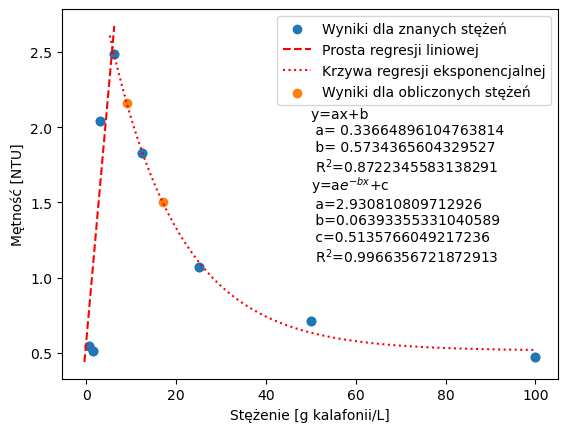

In [4]:
c_=[c[0]]+c[2:4]
Nef_=[Nef[0]]+list(Nef[2:4])
a=LinReg(c_,Nef_)[0][0]
b=LinReg(c_,Nef_)[0][1]
r1_2=LinReg(c_,Nef_)[2]
x=np.array([c_[0]-1,c_[-1]])
plt.scatter(c,Nef,color='C0', label='Wyniki dla znanych stężeń')
plt.plot(x,x*a+b,color='r',ls='--',label='Prosta regresji liniowej')
x=np.array(c[3:])
y=np.array(Nef[3:])
def f(t,a,b,c):
    y=a*np.exp(-b*t)+c
    return y
popt, pcov = curve_fit(f, x, y)
a1 = popt[0]
b1 = popt[1]
c1 = popt[2]
z=np.arange(c[3]-1,c[7],0.1)
plt.plot(z,a1*np.exp(-b1*z)+c1,color='r', linestyle=':',label='Krzywa regresji eksponencjalnej')
plt.scatter(c,Nef)
residuals = y- f(x,a1,b1,c1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r2_2 = 1 - (ss_res / ss_tot)
Nef_nieznane=Nef_C
Nef_nieznane=list(Nef_nieznane)
ostatni=Nef_nieznane.pop(-1)
Nef_nieznane=np.flip(np.array(Nef_nieznane))
C_nieznane=-np.log((Nef_nieznane-c1)/a1)/b1
plt.scatter(C_nieznane[1:],Nef_nieznane[1:],label='Wyniki dla obliczonych stężeń')
plt.text(50,1.7,f'y=ax+b \n a= {a} \n b= {b} \n R$^2$={r1_2}')
plt.text(50,1.1,'y=a$e^{-bx}$+c\n'+f' a={a1} \n b={b1} \n c={c1} \n R$^2$={r2_2} ')
plt.legend()
plt.xlabel('Stężenie [g kalafonii/L]')
plt.ylabel('Mętność [NTU]')

In [5]:
(C_nieznane[1]*2+C_nieznane[2])/2

17.50451171007605